In [9]:
# Step 1: Load and Inspect the Data
#Step 2: Clean and Preprocess
#Step 3: Funnel Conversion Rates
#Step 4: Event Distribution Over Time
#Step 5: Session Funnel Breakdown


!pip install --upgrade kagglehub
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Download latest version
path = kagglehub.dataset_download("mkechinov/ecommerce-behavior-data-from-multi-category-store")

df = pd.read_csv('/Users/dmitrysologub/.cache/kagglehub/datasets/mkechinov/ecommerce-behavior-data-from-multi-category-store/versions/8/2019-Oct.csv')

df.head(2)


  Attempting uninstall: kagglehub
    Found existing installation: kagglehub 0.3.12
    Uninstalling kagglehub-0.3.12:
      Successfully uninstalled kagglehub-0.3.12


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00 UTC,view,44600062,2103807459595387724,NaN,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
1,2019-10-01 00:00:00 UTC,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc


In [83]:
#Step 2: Clean and Preprocess

df['event_time'] = pd.to_datetime(df['event_time'])
df['hour'] = df['event_time'].dt.hour
df['day'] = df['event_time'].dt.day_name()


In [12]:
#Step 3: Funnel Conversion Rates
#We’ll calculate how many users perform each type of event and analyze overall conversion from view → cart → purchase.

# Get sets of unique users for each event type
view_users = set(df[df['event_type'] == 'view']['user_id'])
cart_users = set(df[df['event_type'] == 'cart']['user_id'])
purchase_users = set(df[df['event_type'] == 'purchase']['user_id'])

# Calculate conversions as the share of users who moved from one stage to another
view_to_cart_conv = len(view_users & cart_users) / len(view_users)
view_to_purchase_conv = len(view_users & purchase_users) / len(view_users)
cart_to_purchase_conv = len(cart_users & purchase_users) / len(cart_users)

# Print results as percentages with two decimal places
print(f"View → Cart conversion: {view_to_cart_conv * 100:.2f}%")
print(f"View → Purchase conversion: {view_to_purchase_conv * 100:.2f}%")
print(f"Cart → Purchase conversion: {cart_to_purchase_conv * 100:.2f}%")




Конверсия пользователей с просмотра в корзину : 11.15%
Конверсия пользователей с просмотра к покупке : 11.48%
Конверсия пользователей с корзины к покупке : 60.15%


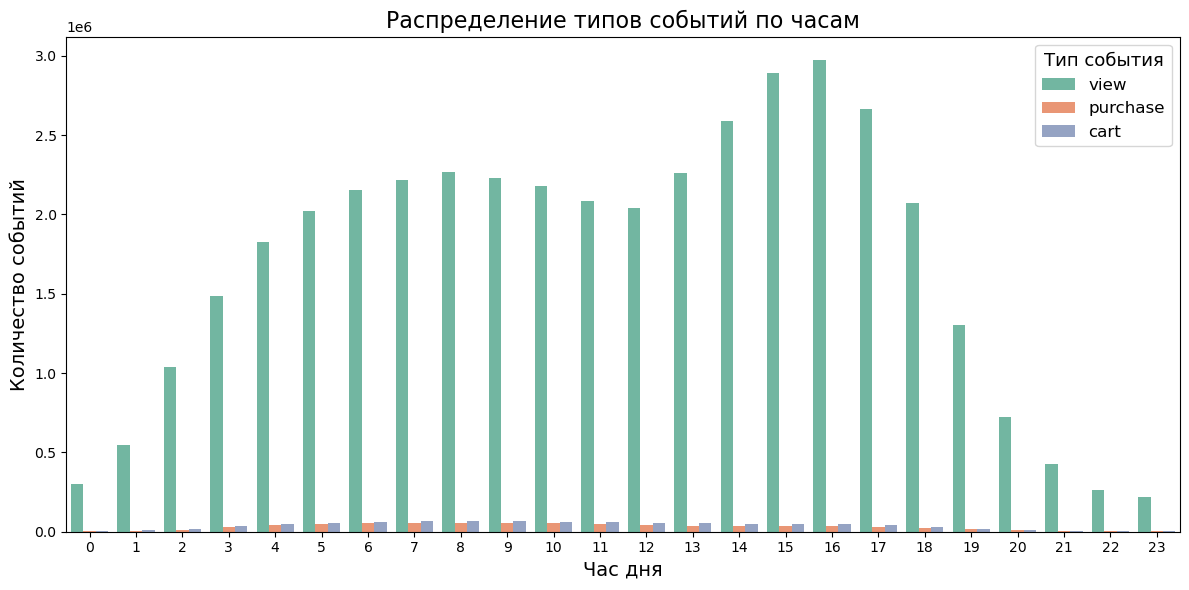

In [69]:
#Step 4: Event Distribution Over Time


plt.figure(figsize=(12, 6)) 

sns.countplot(data=df, x='hour', hue='event_type', palette='Set2') 

plt.title('Distribution of Event Types by Hour', fontsize=16)
plt.xlabel('Hour of Day', fontsize=14)
plt.ylabel('Number of Events', fontsize=14)
plt.xticks(rotation=0)
plt.legend(title='Event Type', fontsize=12, title_fontsize=13)
plt.tight_layout()
plt.show()



In [16]:
#Step 4: Event Distribution Over Time

import matplotlib.pyplot as plt
import seaborn as sns

days_order = [
    'Monday', 'Tuesday', 'Wednesday',
    'Thursday', 'Friday', 'Saturday', 'Sunday'
]

# Plot
plt.figure(figsize=(10, 6))
sns.countplot(
    data=df,
    x='day',
    hue='event_type',
    order=days_order
)

plt.title('Event Type by Day of Week', fontsize=14)
plt.xlabel('Day of Week')
plt.ylabel('Number of Events')
plt.xticks(rotation=45)
plt.legend(title='Event Type')
plt.tight_layout()
plt.show()




ValueError: Could not interpret value `day` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

In [170]:
#Step 5: Session Funnel Breakdown

brand_conversion = df.groupby(['brand', 'event_type'])['user_id'].nunique().unstack().fillna(0)

brand_conversion['view_to_cart'] = round((brand_conversion['cart'] / brand_conversion['view']) * 100, 2)
brand_conversion['view_to_purchase'] = round((brand_conversion['purchase'] / brand_conversion['view']) * 100, 2)
brand_conversion['cart_to_purchase'] = round((brand_conversion['purchase'] / brand_conversion['cart']) * 100, 2)

brand_conversion['view_to_cart'] = brand_conversion['view_to_cart'].apply(lambda x : f"{x:.2f}%")
brand_conversion['view_to_purchase'] = brand_conversion['view_to_purchase'].apply(lambda x : f"{x:.2f}%")
brand_conversion['cart_to_purchase'] = brand_conversion['cart_to_purchase'].apply(lambda x : f"{x:.2f}%")

brand_conversion = brand_conversion.sort_values('view', ascending = False)
display(brand_conversion.head(10))


event_type,cart,purchase,view,view_to_cart,view_to_purchase,cart_to_purchase
brand,,,,,,
samsung,119555.0,94073.0,935464.0,12.78%,10.06%,78.69%
apple,82063.0,65593.0,729319.0,11.25%,8.99%,79.93%
xiaomi,43409.0,35063.0,470832.0,9.22%,7.45%,80.77%
huawei,19042.0,15378.0,234061.0,8.14%,6.57%,80.76%
lg,6992.0,5970.0,145762.0,4.80%,4.10%,85.38%
lucente,0.0,6928.0,145492.0,0.00%,4.76%,inf%
bosch,3875.0,4175.0,142152.0,2.73%,2.94%,107.74%
sony,5143.0,4406.0,122111.0,4.21%,3.61%,85.67%
cordiant,3506.0,7723.0,119818.0,2.93%,6.45%,220.28%
